# Text prerprocessing and topic modelling

This notebook shows the stages of data preparation and modelling for the thematic analysis of newspaper texts. The notebook is devided according to three sets of data used in the report: 1880s and 1917 newspapers (page-level data) and 1880s newspapers' text sections.

In [ ]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

Installation of packages:  
`httpuv` & `googledrive` for accessing google drive files via R colab notebook  
`tidytext`, `tidyverse` & `topicmodels` for preprocessing and building the model

In [ ]:
system2('sudo', 'apt-get install libgsl0-dev')

In [ ]:
install.packages("topicmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘BH’, ‘modeltools’, ‘slam’, ‘tm’




In [ ]:
library(topicmodels)

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("googledrive") 
install.packages("httpuv") 
library("googledrive") 
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’




In [ ]:
install.packages("tidytext")
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’




In [ ]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
getwd()

[1] "/content"

In [ ]:
system("ls", TRUE)

[1] "sample_data"

## 1917

This part downloads lemmatised data table with frequencies, filter stopwords and select MFW for the dtm and topic model

In [ ]:
system("gdown --id  1nu77CYgOhiVGAtBa0U0MHfwlD-fwlXEK") # 1917

In [ ]:
np_1917 <- read.csv("MFW_1917.csv")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“embedded nul(s) found in input”


In [ ]:
np_1917_tt <- np_1917 %>% select(PageID, lemma, n)
head(np_1917_tt)

,PageID,lemma,n
,<chr>,<chr>,<int>
1,revelskojeslovo19170201.1.2,и,191
2,nasheslovo19171129.1.2,gt,189
3,nasheslovo19171123.1.3,gt,183
4,revelskojeslovo19170722.1.2,и,178
5,revelskojeslovo19170803.1.2,и,178
6,revelskojeslovo19170609.1.2,и,169


In [ ]:
stoplist <- c("что", "это", "быть", "тот", "который", "", "они", "для", "наш", "свой", "этот", "тот", "как", "все", "год",
"при", "час", "она", "есть", "чтобы", "давать", "один", "только", "время", "кто", "так", "огь", "уже", "ваш", "сто", "amp",
"1917", "1916", "под", "сие", "или", "день", "оть", "пта",
"январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь", 
"апр", "ола", "кал", "вол", "ком", "коми", "сент", "дтя", "ото", "ода", "кой", "walla",
"власть", "часть", "еще", "весь", "должный", "такой", "если", "себя", "сам", "окт", "том", "когда", "про", "прo", "копа", "руб",
"теперь", "также", "без", "лишь", "раз")

Filtering stoplist and correct one very frequent OCR misspelling

In [ ]:
np_1917_t <- np_1917_tt %>% 
  select(PageID, lemma, n) %>% 
  filter(!str_detect(lemma, "^\\w$|^\\w{2}$|^\\d+$") & !lemma %in% stoplist) %>% 
  mutate(lemma = ifelse(lemma == "чго", "что", lemma))

In [ ]:
head(np_1917_t)
nrow(np_1917_t)

,PageID,lemma,n
,<chr>,<chr>,<int>
1,ekmteataja19170608.1.4,wallas,81
2,tooljasojavnoukteat19170505.1.2,кат,76
3,svobodnojeslovosoldata19170519.1.4,клуб,55
4,tooljasojavnoukteat19170730.1.3,рабочтй,45
5,tooljasojavnoukteat19171104.1.3,тов,45
6,ekmteataja19171026.1.4,ревель,40


[1] 4015719

Mean number of words per page (1 page = 1 document for the model)

In [ ]:
np_1917_t %>% 
  group_by(PageID) %>% 
  summarise(words = sum(n)) %>%
  ungroup() %>% 
  summarise(avg = mean(words))

avg
<dbl>
1365.977


In [ ]:
np_1917_t %>% 
  filter(PageID == "ekmteataja19170608.1.1") %>% 
  head(10)

np_1917_t %>% 
  filter(PageID == "ekmteataja19170608.1.2") %>% 
  head(10)

,PageID,lemma,n
,<chr>,<chr>,<int>
1,ekmteataja19170608.1.1,ломбард,6
2,ekmteataja19170608.1.1,считать,6
3,ekmteataja19170608.1.1,городской,5
4,ekmteataja19170608.1.1,реестр,5
5,ekmteataja19170608.1.1,устав,5
6,ekmteataja19170608.1.1,выборы,4
7,ekmteataja19170608.1.1,губернш,4
8,ekmteataja19170608.1.1,недействительный,4
9,ekmteataja19170608.1.1,вносить,3


,PageID,lemma,n
,<chr>,<chr>,<int>
1,ekmteataja19170608.1.2,губернский,6
2,ekmteataja19170608.1.2,молоко,6
3,ekmteataja19170608.1.2,губернский,5
4,ekmteataja19170608.1.2,обязательный,5
5,ekmteataja19170608.1.2,ведомость,4
6,ekmteataja19170608.1.2,взиматься,4
7,ekmteataja19170608.1.2,корпус,4
8,ekmteataja19170608.1.2,литр,4
9,ekmteataja19170608.1.2,объявлести,4


In [ ]:
length(unique(np_1917_t$PageID))

[1] 3234

In [ ]:
length(unique(np_1917_t$lemma))

[1] 1538097

In [ ]:
np_1917_r <- np_1917_t %>% 
  filter(n > 2)

length(unique(np_1917_r$lemma))

[1] 8174

In [ ]:
dtm_1917 <- np_1917_r %>% # np_1917_r for limited n words , np_1917_t for all words
  cast_dtm(PageID, lemma, n)

dtm_1917

<<DocumentTermMatrix (documents: 3228, terms: 8174)>>
Non-/sparse entries: 68975/26316697
Sparsity           : 100%
Maximal term length: 19
Weighting          : term frequency (tf)

In [ ]:
rm(lda_1917, beta, gamma)

In [ ]:
lda_1917 <- LDA(dtm_1917, k = 50, control = list(seed = 1234))
lda_1917

A LDA_VEM topic model with 50 topics.

In [ ]:
beta <- tidy(lda_1917, matrix = "beta")
gamma <- tidy(lda_1917, matrix = "gamma")

In [ ]:
head(beta)
head(gamma)

topic,term,beta
<int>,<chr>,<dbl>
1,wallas,1.339388e-205
2,wallas,3.481056e-205
3,wallas,4.334596e-204
4,wallas,1.733437e-222
5,wallas,3.939028e-203
6,wallas,7.180636e-202


document,topic,gamma
<chr>,<int>,<dbl>
ekmteataja19170608.1.4,1,6.787699e-05
tooljasojavnoukteat19170505.1.2,1,1.431543e-04
svobodnojeslovosoldata19170519.1.4,1,5.149292e-02
tooljasojavnoukteat19170730.1.3,1,1.005049e-01
tooljasojavnoukteat19171104.1.3,1,1.486495e-04
ekmteataja19171026.1.4,1,1.462436e-04


In [ ]:
beta_top <- beta %>% 
  group_by(topic) %>% 
  slice_max(beta, n = 7)

head(beta_top)

topic,term,beta
<int>,<chr>,<dbl>
1,союз,0.18898301
1,бюро,0.12011159
1,общий,0.08523857
1,комитет,0.06644290
1,член,0.06301904
1,собирать,0.04266352


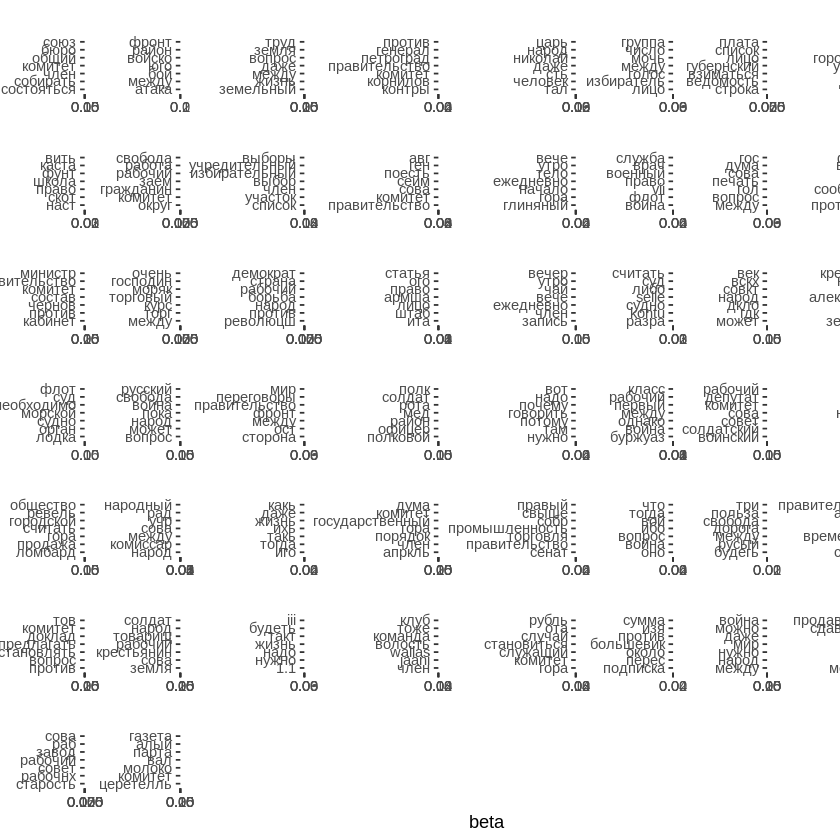

In [ ]:
beta_top %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()


In [ ]:
write.csv(beta, "beta_1917_50.csv")
write.csv(gamma, "gamma_1917_50.csv")

In [ ]:
gamma %>% 
  #separate(document, into = c("id", "month"), sep = "_") %>% 
  head

document,topic,gamma
<chr>,<int>,<dbl>
ekmteataja19170608.1.4,1,8.405926e-05
tooljasojavnoukteat19170505.1.2,1,1.776217e-04
svobodnojeslovosoldata19170519.1.4,1,2.035093e-04
tooljasojavnoukteat19170730.1.3,1,2.831997e-01
tooljasojavnoukteat19171104.1.3,1,1.844657e-04
ekmteataja19171026.1.4,1,1.814690e-04


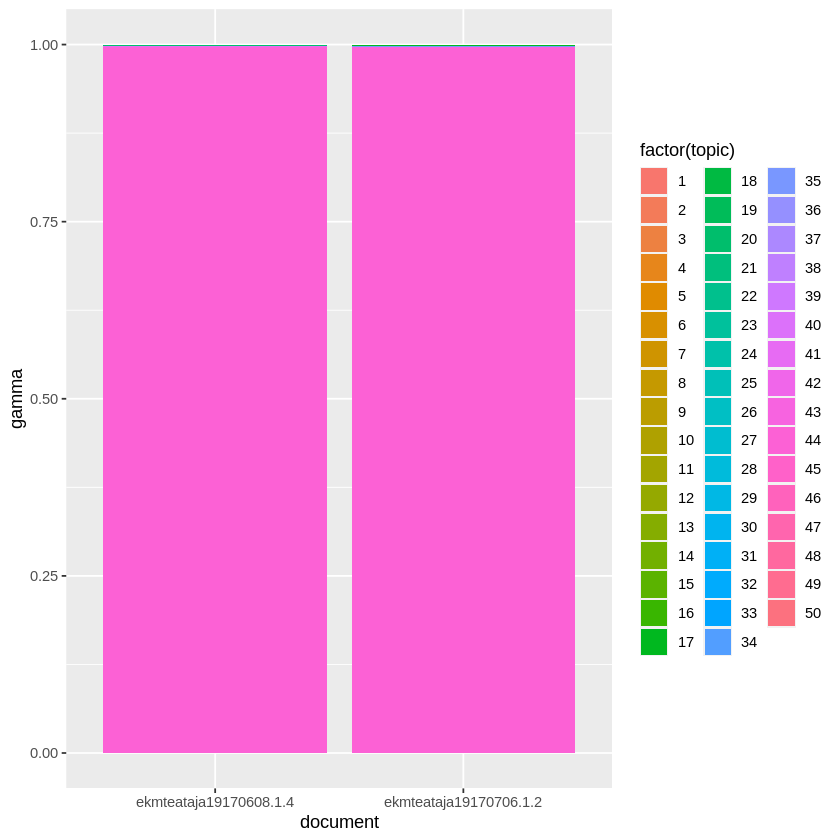

In [ ]:
gamma %>% 
  filter(document == "ekmteataja19170706.1.2" | document == "ekmteataja19170608.1.4") %>% 
  ggplot(aes(x = document, y = gamma, fill = factor(topic))) + geom_col()

In [ ]:
gamma <- gamma %>% 
  mutate(per_name = str_replace_all(document, "(\\w+)(\\d{8})\\.\\d+\\.\\d+", "\\1")) %>% 
  mutate(year = str_replace_all(document, "(\\w+)(\\d{4})(\\d{4})\\.(\\d+)\\.(\\d+)", "\\2")) %>% 
  mutate(month = str_replace_all(document, "(\\w+)(\\d{4})(\\d{2})(\\d{2})\\.(\\d+)\\.(\\d+)", "\\3"))
  
gamma_per <- gamma %>% 
  group_by(topic, per_name) %>% 
  summarise(gamma_avg = mean(gamma)) 

`summarise()` has grouped output by 'topic'. You can override using the
`.groups` argument.


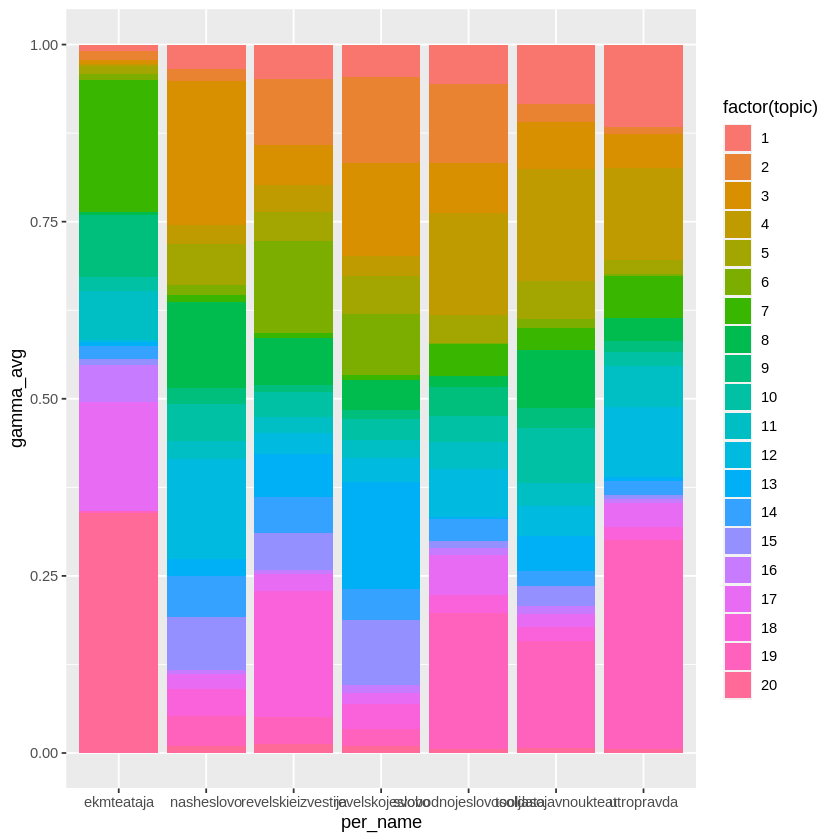

In [ ]:
gamma_per %>%
  ggplot(aes(x = per_name, y = gamma_avg, fill = factor(topic))) + 
  geom_col() # + theme(legend.position = "None")

In [ ]:
head(gamma)

document,topic,gamma,per_name,year,month
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
ekmteataja19170608.1.4,1,9.999475e-01,ekmteataja,1917,06
tooljasojavnoukteat19170505.1.2,1,2.406055e-05,tooljasojavnoukteat,1917,05
svobodnojeslovosoldata19170519.1.4,1,7.935344e-01,svobodnojeslovosoldata,1917,05
ekmteataja19170706.1.2,1,9.999538e-01,ekmteataja,1917,07
tooljasojavnoukteat19170730.1.3,1,9.999608e-01,tooljasojavnoukteat,1917,07
tooljasojavnoukteat19171104.1.3,1,9.999564e-01,tooljasojavnoukteat,1917,11


`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


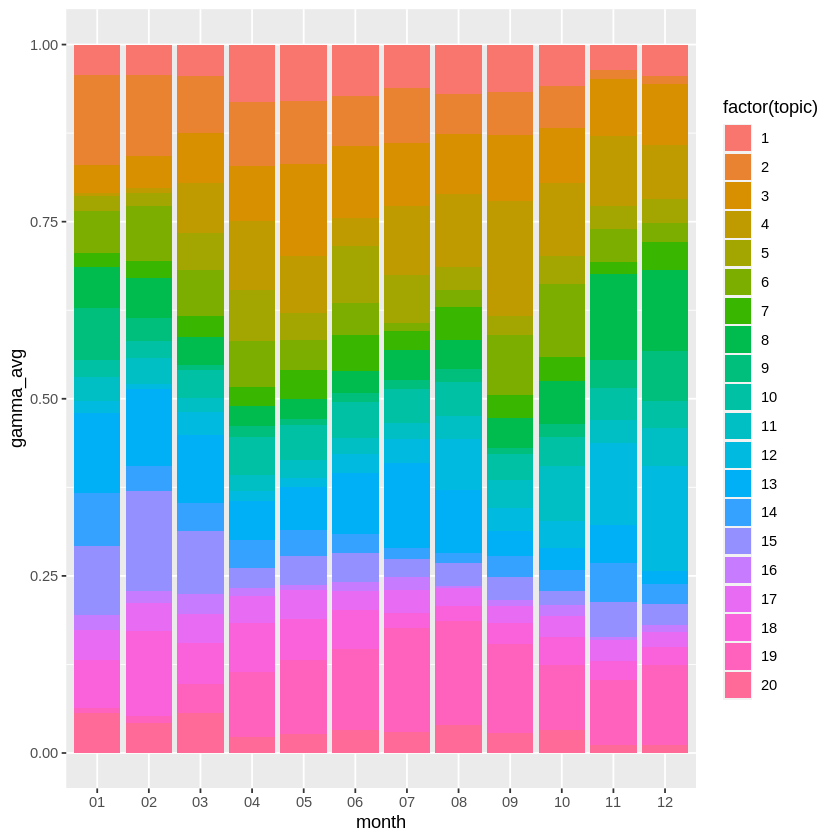

In [ ]:
gamma %>% 
  group_by(month, topic) %>% 
  summarise(gamma_avg = mean(gamma)) %>% 
  ggplot(aes(x = month, y = gamma_avg, fill = factor(topic))) + geom_col()

In [ ]:
beta %>% 
  filter(topic == 12) %>% 
  slice_max(beta, n = 10)

## 1880s

In [ ]:
system("gdown --id  1WdVNfTOPYnLqFuOV3d_IiJIBYuI5dGxr")

In [ ]:
system("ls", TRUE)

[1] "sample_data"

In [ ]:
dat <- read.csv('MFW_biling_1880_lem.csv')

Warning message in file(file, "rt"):
“cannot open file 'MFW_biling_1880_lem.csv': No such file or directory”


ERROR: ignored

In [ ]:
head(dat)

In [ ]:
dat <- dat %>% 
  select(PageID, lemma, n) %>% 
  mutate(Page_ID = ifelse(str_detect(lemma, "[А-Яа-я]"), paste0(PageID, "_rus"), paste0(PageID, "_ger")))

In [ ]:
nrow(dat)

In [ ]:
dat <- dat %>% 
  group_by(PageID, lemma) %>% 
  summarise(n = sum(n))

In [ ]:
nrow(dat)

In [ ]:
head(dat)

In [ ]:
stoplist <- c("что", "это", "быть", "тот", "который", "", "они", "для", "наш", "свой", "этот", "тот", "как", "все", "год",
"при", "час", "она", "есть", "чтобы", "давать", "один", "только", "время", "кто", "так", "огь", "уже", "ваш", "сто", "amp",
"под", "сие", "или", "день", "оть", "пта",
"январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь",
"часть", "еще", "весь", "должный", "такой", "если", "себя", "сам", "окт", "том", "когда", "про", "прo", "копа", 
"кой", "сей", "мочь", "без",
"der", "die", "das", "dem", "den", "von", "des", "werden", "auf", "bei", "und", "mit", "vom", "zur", "uhr", "daß", 
"für", "zum", "sich", "wird", "welche", "ein", "eine", "eins", "groß", "ist", "mal", "aus", "oder", "nicht", "kop", "als",
"durch", "nach", "sie", "er", "es", "pfd", "bis", "per", "dito", "unter", "mai", "aus", "allen", "alle", "alles", "thlr", 
"diese", "dieses", "diesem", "diesen", "auch", "man", "sind", "ich", "nur", "einem", "wenn", "hat", "haben", "alt",
"einer", "sub", "worden", "belegene", "dess", "herrn", "herr", "über", "dieser", "aber", "nebst", "wie", "pol", 
"sammt", "jahr")

In [ ]:
dat_t <- dat %>% 
  select(PageID, lemma, n) %>% 
  filter(!str_detect(lemma, "^\\w$|^\\w{2}$|^\\d+$") & !lemma %in% stoplist) %>% 
  #filter(str_detect(lemma, "[А-Яа-я]")) %>%  # filter only russian
  mutate(lemma = ifelse(lemma == "дес", "лес", lemma)) %>% 
  mutate(lemma = ifelse(lemma == "правлешя", "правление", lemma))

In [ ]:
dat_t %>% 
  group_by(PageID) %>% 
  summarise(words = sum(n)) %>% 
  summarise(page_avg = mean(words))

In [ ]:
head(dat_t)

In [ ]:
dat_t %>% 
  filter(lemma == "der")

In [ ]:
dat_ranked <- dat_t %>% 
  filter(n > 5)

length(unique(dat_t$lemma))
length(unique(dat_ranked$lemma))

t <- dat_ranked %>% 
  mutate(lang = ifelse(str_detect(lemma, "[А-Яа-я]"), "rus", "ger"))

table(t$lang)

In [ ]:
dtm_1880 <- dat_ranked %>%
  cast_dtm(PageID, lemma, n)

dtm_1880

In [ ]:
lda_1880 <- LDA(dtm_1880, k = 20, control = list(seed = 1234))
lda_1880

In [ ]:
beta <- tidy(lda_1880, matrix = "beta")
gamma <- tidy(lda_1880, matrix = "gamma")

In [ ]:
write.csv(beta, "beta_1880_20.csv")
write.csv(gamma, "gamma_1880_20.csv")

In [ ]:
head(beta)
head(gamma)

In [ ]:
beta_top <- beta %>% 
  group_by(topic) %>% 
  slice_max(beta, n = 10)

head(beta_top)

In [ ]:
beta_top %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()


In [ ]:
gamma %>% 
  separate(document, into = c("id", "month"), sep = "_") %>% 
  head

In [ ]:
gamma_avg <- gamma %>% 
  separate(document, into = c("id", "month"), sep = "_") %>% 
  group_by(topic, month) %>% 
  summarise(gamma_avg = mean(gamma)) 

top <- gamma_avg %>% 
  ungroup() %>% 
  arrange(desc(gamma_avg)) %>% 
  head(50)

In [ ]:
top %>%
  ggplot(aes(x = month, y = gamma_avg, fill = factor(topic))) + 
  geom_col() # + theme(legend.position = "None")

In [ ]:
gamma_avg %>% 
  filter(month == "5") %>% 
  arrange(desc(gamma_avg)) %>% 
  head

In [ ]:
beta %>% 
  filter(topic == 12) %>% 
  slice_max(beta, n = 10)

## 1880s sections

In [ ]:
system("gdown --id  1dmp0q2GIaN4VCryhsZtH_7SPKVBV6GqJ")

In [ ]:
system("ls", TRUE)

[1] "mfw_1880_sections_lem.csv" "sample_data"

In [ ]:
dat <- read.csv('mfw_1880_sections_lem.csv')

In [ ]:
dat <- dat %>% select(-`X.1`, -Unnamed..0, -X)
head(dat)

,word,LogicalSectionID,n,word_count,lemma
,<chr>,<chr>,<int>,<int>,<chr>
1,groß,livzeitung18800613.2.2.2,507,21256,groß
2,подп,ekmteataja18891228.2.5,484,565,подп
3,der,livzeitung18800430.2.2.4,481,229968,der
4,thlr,livzeitung18800613.2.2.2,478,15158,thlr
5,groß,livzeitung18800611.2.2.3,462,21256,groß
6,пожертв,ekmteataja18891228.2.5,458,465,пожертва


In [ ]:
dat <- dat %>% 
  rename(section_id = LogicalSectionID) %>% 
  select(section_id, lemma, n) %>% 
  mutate(section_id = ifelse(str_detect(lemma, "[А-Яа-я]"), paste0(section_id, "_rus"), paste0(section_id, "_ger")))

In [ ]:
nrow(dat)

[1] 5995852

In [ ]:
# sum number of words in each section (there might be duplicates since previous count was done on non-lemmatized text)

dat_sections <- dat %>% 
  group_by(section_id, lemma) %>% 
  summarise(n = sum(n))

`summarise()` has grouped output by 'section_id'. You can override using the
`.groups` argument.


In [ ]:
nrow(dat_sections)

[1] 5504282

In [ ]:
head(dat_sections)

section_id,lemma,n
<chr>,<chr>,<int>
ekmteataja18800103.2.2_rus,оффициальный,1
ekmteataja18800103.2.2_rus,часть,1
ekmteataja18800103.2.2.1_ger,abfassung,2
ekmteataja18800103.2.2.1_ger,abgabenquittung,1
ekmteataja18800103.2.2.1_ger,abgedruckt,1
ekmteataja18800103.2.2.1_ger,abhanden,1


In [ ]:
stoplist <- c("что", "это", "быть", "тот", "который", "", "они", "для", "наш", "свой", "этот", "тот", "как", "все", "год",
"при", "час", "она", "есть", "чтобы", "давать", "один", "только", "время", "кто", "так", "огь", "уже", "ваш", "сто", "amp",
"под", "сие", "или", "день", "оть", "пта",
"январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь",
"часть", "еще", "весь", "должный", "такой", "если", "себя", "сам", "окт", "том", "когда", "про", "прo", "копа", 
"кой", "сей", "мочь", "без",
"оффициальный", "часть",
"der", "die", "das", "dem", "den", "von", "des", "werden", "auf", "bei", "und", "mit", "vom", "zur", "uhr", "daß", 
"für", "zum", "sich", "wird", "welche", "ein", "eine", "eins", "groß", "ist", "mal", "aus", "oder", "nicht", "kop", "als",
"durch", "nach", "sie", "er", "es", "pfd", "bis", "per", "dito", "unter", "mai", "aus", "allen", "alle", "alles", "thlr", 
"diese", "dieses", "diesem", "diesen", "auch", "man", "sind", "ich", "nur", "einem", "wenn", "hat", "haben", "alt",
"einer", "sub", "worden", "belegene", "dess", "herrn", "herr", "über", "dieser", "aber", "nebst", "wie", "pol", 
"sammt", "jahr")

Filter stoplist & correct two very frequent misspellings

In [ ]:
dat_t <- dat_sections %>% 
  select(section_id, lemma, n) %>% 
  filter(!str_detect(lemma, "^\\w$|^\\w{2}$|^\\d+$") & !lemma %in% stoplist) %>% 
  mutate(lemma = ifelse(lemma == "дес", "лес", lemma)) %>% 
  mutate(lemma = ifelse(lemma == "правлешя", "правление", lemma))

Average section length

In [ ]:
dat_t %>% 
  group_by(section_id) %>% 
  summarise(words = sum(n)) %>% 
  summarise(section_avg = mean(words))

section_avg
<dbl>
201.5141


In [ ]:
summary(dat_t %>% group_by(section_id) %>% summarise(words = sum(n)) %>% select(words))

     words        
 Min.   :   1.00  
 1st Qu.:   5.75  
 Median :  42.00  
 Mean   : 201.51  
 3rd Qu.: 201.00  
 Max.   :9481.00  

In [ ]:
head(dat_t)

section_id,lemma,n
<chr>,<chr>,<int>
ekmteataja18800103.2.2.1_ger,abfassung,2
ekmteataja18800103.2.2.1_ger,abgabenquittung,1
ekmteataja18800103.2.2.1_ger,abgedruckt,1
ekmteataja18800103.2.2.1_ger,abhanden,1
ekmteataja18800103.2.2.1_ger,abweichungen,1
ekmteataja18800103.2.2.1_ger,anordnung,1


In [ ]:
dat_t %>% 
  filter(lemma == "der")

section_id,lemma,n
<chr>,<chr>,<int>


Filter only 8k MFW

In [ ]:
dat_ranked <- dat_t %>% 
  filter(n > 5)

length(unique(dat_t$lemma))
length(unique(dat_ranked$lemma))

t <- dat_ranked %>% 
  mutate(lang = ifelse(str_detect(lemma, "[А-Яа-я]"), "rus", "ger"))

table(t$lang)

[1] 36097

[1] 8899


   ger    rus 
102836 118120 

In [ ]:
dtm_1880_sections <- dat_ranked %>%
  cast_dtm(section_id, lemma, n)

dtm_1880_sections

<<DocumentTermMatrix (documents: 15097, terms: 8899)>>
Non-/sparse entries: 220890/134127313
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)

In [ ]:
write.csv(dat_ranked, "mfw_1880_sections_dat_ranked. csv")

In [ ]:
save(dtm_1880_sections, file = "dtm_1880_sections.Rda")

Building the model and store the results

In [ ]:
lda_1880_s <- LDA(dtm_1880_sections, k = 20, control = list(seed = 1234))
lda_1880_s

A LDA_VEM topic model with 20 topics.

In [ ]:
beta <- tidy(lda_1880_s, matrix = "beta")
gamma <- tidy(lda_1880_s, matrix = "gamma")

In [ ]:
write.csv(beta, "beta_1880_sections_20.csv")
write.csv(gamma, "gamma_1880_sections_20.csv")

In [ ]:
lda_1880_l <- LDA(dtm_1880_sections, k = 50, control = list(seed = 1234))
lda_1880_l

beta <- tidy(lda_1880_l, matrix = "beta")
gamma <- tidy(lda_1880_l, matrix = "gamma")

In [ ]:
write.csv(beta, "beta_1880_sections_50.csv")
write.csv(gamma, "gamma_1880_sections_50.csv")